# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**Ye Seo Park**

Place your academic honesty statement below. Here are some acceptable examples.

-   I worked alone on this assignment -PYS

# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**


In [404]:
import numpy as np 
from sympy import Symbol, solve

#Variables
V = Symbol('v') # cm**3
n = 1 # mol
R = 83.14 # cm**3 bar/(K*mol)
T = 200+273.15 # K
P = 10 # bar


#Calculation
equation = (P*V)-(n*R*T)
vol = solve(equation).pop()

#Result
print(round(vol, 1),'cm\u00b3')

3933.8 cm³


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [411]:
import numpy as np

#Variables
B = -388 # in cm**3/mol
C = -26000 # in cm**6/mol


#Calculation
equation = (P*V)/(R*T)-1-(B/V)-(C/V**2)


#Result
ppar = [P/(R*T), -1.0, -B, -C]
print(np.roots(ppar))

[3487.74201641  504.18969462  -58.16261103]


### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



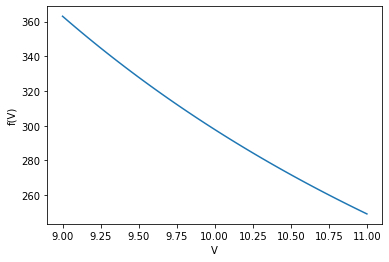

In [425]:
import numpy as np
import matplotlib.pyplot as plt


#Definition of f(V)
def f(V):
    return P*V/(R*T)-1-(B/V)-(C/V**2)

#Plot information
V = np.linspace (9,11)
plt.plot(V, f(V))
plt.xlabel('V')
plt.ylabel('f(V)')
plt.show()

State in words where the solution(s) are.

**f(10) = 298**

### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.



In [575]:
import numpy as np

#Variables
B = -388 # cm**3/mol
C = -26000 # cm**6/mol

#Definition of f(V)
def f(V):
    return P*V/(R*T)-1-(B/V)-(C/V**2)

#Cubic polynomial form (if, V=/0)
equation = (P/(R*T)*V**3)-(V**2)-(B*V)-(C)


#Result
ppar = [P/(R*T), -1.0, -B, -C]
print(np.roots(ppar))

[3487.74201641  504.18969462  -58.16261103]



$$ 0 = 3487.74V^3 -1.0V^2 -504.19V + 58.16 $$

# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [576]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#Definition of lorenz equation
def lorenz(xyz, t, s=10, r=28, b=8/3):
    x, y, z = xyz
    dxdt = s*(y - x)
    dydt = r*x-y-x*z 
    dzdt = -b*z+x*y
    return(np.array([dxdt, dydt, dzdt]))

#Calculation
y0 = np.array([1, 1, 1])
t = np.arange(0, 1000, 0.1)
y = odeint(lorenz, y0, t, args=(10, 28, 8/3))

#Result
print(y[:,0])

[ 1.          2.1331076   6.54252716 ...  3.77306347  9.09815183
 16.45193839]


2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [577]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#Definition of lorenz equation
def lorenz(xyz, t, s=10, r=28, b=8/3):
    x, y, z = xyz
    dxdt = s*(y - x)
    dydt = r*x-y-x*z 
    dzdt = -b*z+x*y
    return(np.array([dxdt, dydt, dzdt]))

#Calculation
y0 = np.array([1, 1, 0.9999])
t = np.arange(0, 1000, 0.1)
y = odeint(lorenz, y0, t, args=(10, 28, 8/3))

#Result
print(y[:,0])

[  1.           2.1331123    6.54255502 ... -11.58639618 -12.63865241
  -7.87733078]


3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

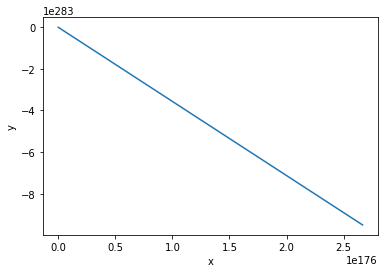

In [578]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#Definition of lorenz equation
def lorenz(xyz, t, s=10, r=28, b=8/3):
    x, y, z = xyz
    dxdt = s*(y - x)
    dydt = r*x-y-x*z 
    dzdt = -b*z+x*y
    return(np.array([dxdt, dydt, dzdt]))

#Calculation
y0 = np.array([1, 1, 1])
t = np.arange(0, 1000, 0.1)
y = odeint(lorenz, y0, t, args=(10, 28, 8/3))

y0 = np.array([1, 1, 1])
t = np.arange(0, 1000, 0.9999)
y = odeint(lorenz, y0, t, args=(10, 28, 8/3))


#Plot information
plt.plot(dxdt, dydt)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

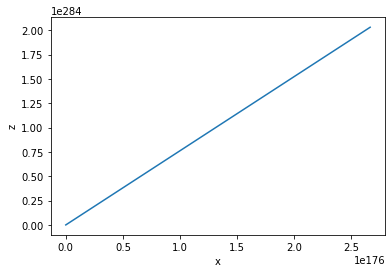

In [579]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#Definition of lorenz equation
def lorenz(xyz, t, s=10, r=28, b=8/3):
    x, y, z = xyz
    dxdt = s*(y - x)
    dydt = r*x-y-x*z 
    dzdt = -b*z+x*y
    return(np.array([dxdt, dydt, dzdt]))

#Calculation
y0 = np.array([1, 1, 1])
t = np.arange(0, 1000, 0.1)
y = odeint(lorenz, y0, t, args=(10, 28, 8/3))

y0 = np.array([1, 1, 1])
t = np.arange(0, 1000, 0.9999)
y = odeint(lorenz, y0, t, args=(10, 28, 8/3))

#Plot information
plt.plot(dxdt, dzdt)
plt.xlabel("x")
plt.ylabel("z")
plt.show()

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

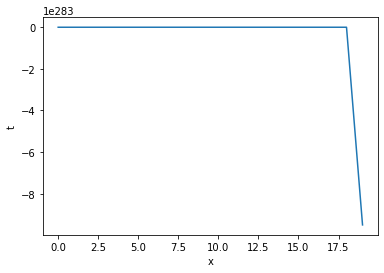

In [574]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#Definition of lorenz equation
def lorenz(xyz, t, s=10, r=28, b=8/3):
    x, y, z = xyz
    dxdt = s*(y - x)
    dydt = r*x-y-x*z 
    dzdt = -b*z+x*y
    return(np.array([dxdt, dydt, dzdt]))

#Calculation
y0 = np.array([1, 1, 1])
t = np.arange(0, 1000, 0.1)
y = odeint(lorenz, y0, t, args=(10, 28, 8/3))

y0 = np.array([1, 1, 1])
t = np.arange(0, 1000, 0.9999)
y = odeint(lorenz, y0, t, args=(10, 28, 8/3))

#Plot information
plt.plot(dxdt)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

**It goes down negative.**

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [587]:
import numpy as np
import pandas as pd

#Calculation
df = pd.read_csv("_Python/florida.csv")
data = "_Python/florida.csv"
np.genfromtxt(data, delimiter = ",")
df.rename(columns={"nan":"dat"})

,week,cases_avg,deaths_avg
0,1,0.29,0.00
1,2,0.29,0.00
2,3,0.43,0.00
3,4,0.43,0.00
4,5,0.57,0.00
...,...,...,...
536,537,23792.86,201.29
537,538,21534.29,212.29
538,539,23313.86,212.29
539,540,23313.86,212.29


Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

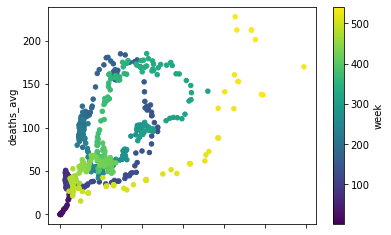

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Calculation
df.plot.scatter(x = "cases_avg", y = "deaths_avg", c = "week", cmap = 'viridis')
plt.show()

**Put Commentary here:**

**The average number of cases and death increases and then decreases again in the circular behavior per 100 weeks.
It looks like going back to near the starting point per 100 weeks until 300 weeks, and the graph shifted to the right, which means cases increases as time goes.
But from the 400th week, there was few cases and death within 50, but case and death increased gradually.**

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

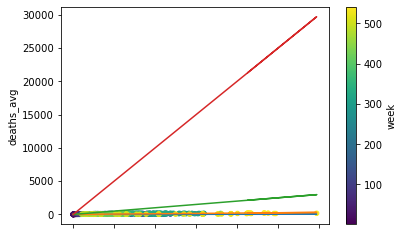

In [588]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Calculation
df.plot.scatter(x = "cases_avg", y = "deaths_avg", c = "week", cmap = 'viridis')
x = df["cases_avg"]
y = df["deaths_avg"]

b = 0 #
w_guess = [0.001, 0.01, 0.1, 1] #

#Linear model for loop
for w in w_guess:
    y_predicted = b + w*x
    plt.plot(x,y_predicted)
    
    
plt.show()

Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

**The yellow straight line, y=0.01x is best fit to the data. best fit means that all the values (points) compressed in a line.**

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here:


**Upload your jupyter notebook to Canvas for grading. Thank you!

In [ ]:
https://github.com/Ye-Seo/Che_Math.git